# Univariate analysis using nistats:
Data set an be obtained from: https://openneuro.org/datasets/ds000114

In [3]:
%matplotlib inline

In [49]:
import pandas as pd
import numpy as np
import glob

In [117]:
#func_data = glob.glob('G:/My Drive/HCP_nilearn_WM/extracted_HCPWM/102109/MNINonLinear/Results/tfMRI_WM_RL/tfMRI_WM_RL.nii.gz')
#print(func_data)

#import nibabel
#nibabel.load(func_data[0])

['G:/My Drive/HCP_nilearn_WM/extracted_HCPWM/102109/MNINonLinear/Results/tfMRI_WM_RL/tfMRI_WM_RL.nii.gz']


In [167]:
# load the data by entering the local path
#func_data = glob.glob('C:/Users/ilkay/open_neuro_data/fmriprep/sub-*/ses-test/func/sub-*_task-fingerfootlips_bold_space-MNI152NLin2009cAsym_preproc.nii.gz')
func_data = glob.glob('G:/My Drive/HCP_nilearn_WM/extracted_HCPWM/*/MNINonLinear/Results/tfMRI_WM_RL/tfMRI_WM_RL.nii.gz')
# define a path to save the zstat maps
save_path = 'C:\\Users\\ilkay\\open_neuro_data\\z_maps\\'

# define some params
nr_sub = len(func_data)
n_scans = 405
tr = .72
epoch_duration = 25 # in sec

print(func_data)
import nibabel
nibabel.load(func_data[0])

nr_sub

['G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\102109\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\102614\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\103010\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\103212\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\106824\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\108020\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\111211\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\113316\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Drive/HCP_nilearn_WM/extracted_HCPWM\\113417\\MNINonLinear\\Results\\tfMRI_WM_RL\\tfMRI_WM_RL.nii.gz', 'G:/My Dr

23

In [168]:
#get the confounds file
conf_data = glob.glob('G:/My Drive/HCP_nilearn_WM/102109_3T_tfMRI_WM_preproc/102109/MNINonLinear/Results/tfMRI_WM_RL/Movement_Regressors.txt')
conf_data

conf_data = 'G:/My Drive/Movement_Regressors.txt'
print(conf_data)
temp_df = np.loadtxt(conf_data)
print(temp_df[:, 0:6].shape)
temp_df=temp_df[:, 0:6]
print(temp_df)

G:/My Drive/Movement_Regressors.txt
(405, 6)
[[-0.046037  0.083527  0.062225 -0.022804 -0.040623  0.      ]
 [-0.026426  0.107996  0.072033  0.       -0.041482  0.      ]
 [-0.035116  0.11814   0.079806  0.       -0.036956  0.033575]
 ...
 [-0.229181  0.177707  0.053774  0.267285  0.115165 -0.207984]
 [-0.256872  0.182428  0.056612  0.289974  0.145875 -0.195379]
 [-0.273119  0.18771   0.073775  0.277999  0.147938 -0.264076]]


In [169]:
#get the confounds file
#conf_data = glob.glob('G:/My Drive/HCP_nilearn_WM/*_3T_tfMRI_WM_preproc/*/MNINonLinear/Results/tfMRI_WM_RL/Movement_Regressors.txt')

# create a list of dataframes with motion confounds and framewise disp
motion_conf = []
for n in range(nr_sub):
    temp_df = np.loadtxt(conf_data)
    sub_motion_conf = temp_df[:, 0:6]

    #sub_motion_conf = pd.DataFrame(temp_df, columns=['X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ'])
    #sub_motion_conf=sub_motion_conf.drop(sub_motion_conf.index[[0,1,2,3]])
    # print(sub_motion_conf.shape)
    motion_conf.append(sub_motion_conf)
    
print(motion_conf)


[array([[-0.046037,  0.083527,  0.062225, -0.022804, -0.040623,  0.      ],
       [-0.026426,  0.107996,  0.072033,  0.      , -0.041482,  0.      ],
       [-0.035116,  0.11814 ,  0.079806,  0.      , -0.036956,  0.033575],
       ...,
       [-0.229181,  0.177707,  0.053774,  0.267285,  0.115165, -0.207984],
       [-0.256872,  0.182428,  0.056612,  0.289974,  0.145875, -0.195379],
       [-0.273119,  0.18771 ,  0.073775,  0.277999,  0.147938, -0.264076]]), array([[-0.046037,  0.083527,  0.062225, -0.022804, -0.040623,  0.      ],
       [-0.026426,  0.107996,  0.072033,  0.      , -0.041482,  0.      ],
       [-0.035116,  0.11814 ,  0.079806,  0.      , -0.036956,  0.033575],
       ...,
       [-0.229181,  0.177707,  0.053774,  0.267285,  0.115165, -0.207984],
       [-0.256872,  0.182428,  0.056612,  0.289974,  0.145875, -0.195379],
       [-0.273119,  0.18771 ,  0.073775,  0.277999,  0.147938, -0.264076]]), array([[-0.046037,  0.083527,  0.062225, -0.022804, -0.040623,  0.     

In [170]:
# get the event onsets
onsets_dir = 'G:/My Drive/HCP_nilearn_WM/onsets_dir.csv'
events = pd.read_csv(onsets_dir)
events_allsub = [events] * nr_sub # multiply events for all sub
events

,duration,onset,trial_type
0,25,10.5,2back
1,25,38.7,0back
2,25,81.8,2back
3,25,110.0,0back
4,25,153.0,0back
5,25,181.2,2back
6,25,224.5,0back
7,25,252.6,2back


In [ ]:
# apply smoothing to the data
from nilearn import image 
func_data_sm = [] # initialize a list to put smoothed data
for n in range(nr_sub):
    func_data_sm.append(image.smooth_img(func_data[n], fwhm=8))

In [123]:
np.shape(func_data_sm[0])

(91, 109, 91, 405)

In [124]:
# check if the smoothing worked
from nilearn.plotting import plot_epi
mean_func = image.mean_img(func_data[0])
smoothed_img = func_data_sm[0]
mean_smoothed_img = image.mean_img(smoothed_img)

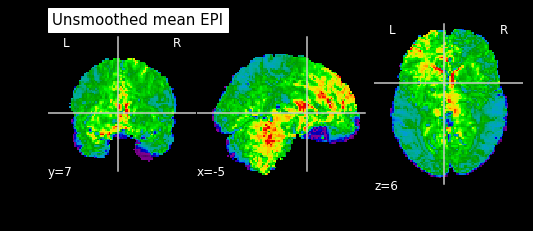

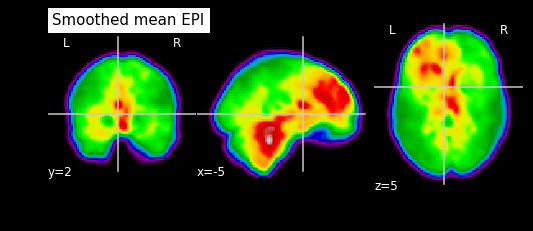

In [125]:
plot_epi(mean_func, title='Unsmoothed mean EPI')
plot_epi(mean_smoothed_img,  title='Smoothed mean EPI')

In [152]:
# define some model parameters
drift_model = None
period_cut = 4. * epoch_duration
hrf_model = 'glover'

# define the model
from nistats.first_level_model import FirstLevelModel
fmri_glm = FirstLevelModel(tr)

#fmri_glm = fmri_glm.fit(func_data_sm, events_allsub, confounds=[pd.DataFrame(motion_conf[0])])
fmri_glm = fmri_glm.fit(func_data_sm, events_allsub)


C:\Users\jgray7700\AppData\Roaming\Python\Python36\site-packages\nistats\first_level_model.py:465: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  labels, results = mem_glm(Y, design.as_matrix(),


In [153]:
events_allsub

[   duration  onset trial_type
 0        25   10.5      2back
 1        25   38.7      0back
 2        25   81.8      2back
 3        25  110.0      0back
 4        25  153.0      0back
 5        25  181.2      2back
 6        25  224.5      0back
 7        25  252.6      2back]

In [154]:
from nistats.reporting import plot_design_matrix
design_matrix = fmri_glm.design_matrices_[0]

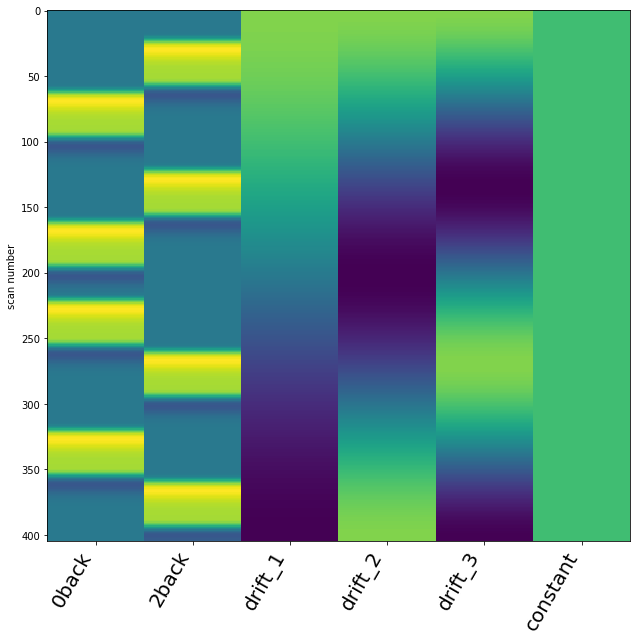

In [155]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
plot_design_matrix(design_matrix, ax=ax)

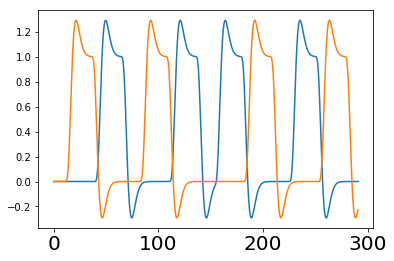

In [156]:
# contrast matrix
contrast_matrix = np.eye(design_matrix.shape[1])
contrasts = dict([(column, contrast_matrix[i])
                  for i, column in enumerate(design_matrix.columns)])
import matplotlib.pyplot as plt
plt.plot(design_matrix['0back'])
plt.plot(design_matrix['2back'])

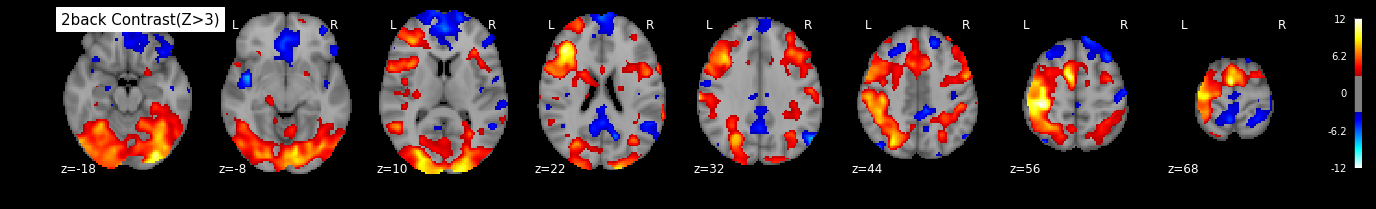

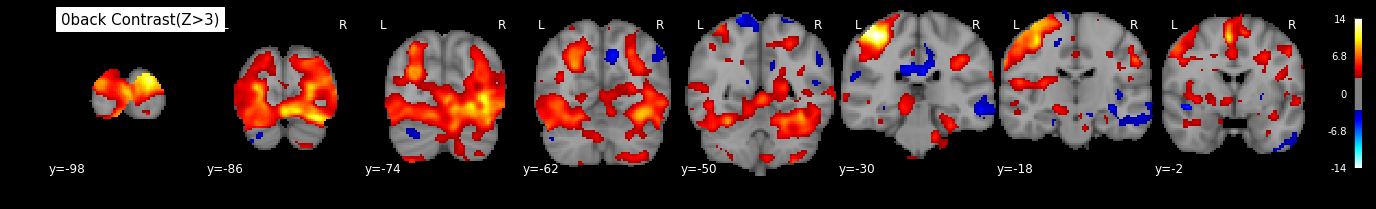

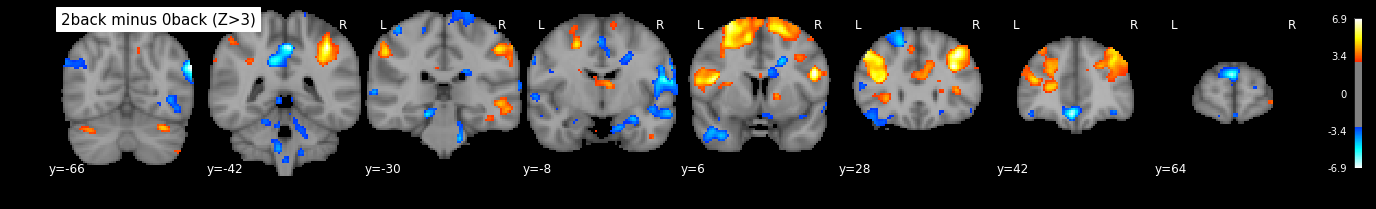

In [164]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
z_map_2back = fmri_glm.compute_contrast('2back', output_type='z_score')
z_map_0back = fmri_glm.compute_contrast('0back', output_type='z_score')
#p_map_0back = fmri_glm.compute_contrast(['0back'], output_type='p_value')

plot_stat_map(z_map_2back, threshold=3.0,
              display_mode='z', cut_coords=8, black_bg=True,
              title='2back Contrast(Z>3)')
plot_stat_map(z_map_0back, threshold=3,
              display_mode='y', cut_coords=8, black_bg=True,
              title='0back Contrast(Z>3)')

twobackminus0back = contrasts['2back'] - contrasts['0back']
z_map_2backminus0back = fmri_glm.compute_contrast(twobackminus0back, output_type='z_score')
plot_stat_map(z_map_2backminus0back, threshold=3,
              display_mode='y', cut_coords=8, black_bg=True,
              title='2back minus 0back (Z>3)')
#save_name = save_path + 'zmap_0back' + '.nii.gz'
#z_map_0back.to_filename(save_name)

C:\Users\ilkay\Miniconda2\envs\py36\lib\site-packages\nistats\first_level_model.py:539: UserWarning: One contrast given, assuming it for all 10 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


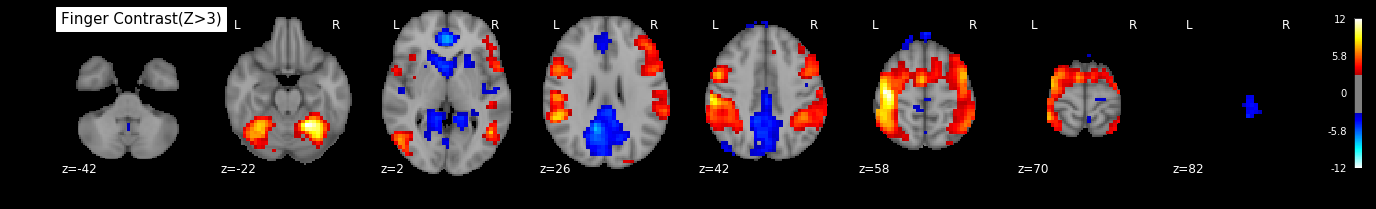

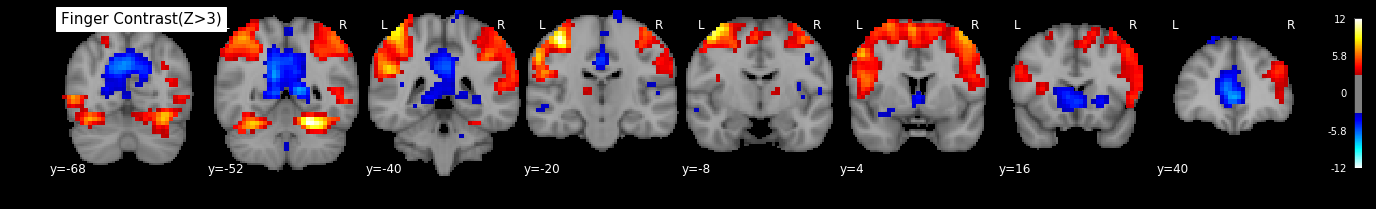

In [45]:
z_map_finger = fmri_glm.compute_contrast('Finger', output_type='z_score')
p_map_finger = fmri_glm.compute_contrast('Finger', output_type='p_value')

plot_stat_map(z_map_finger, threshold=3,
              display_mode='z', cut_coords=8, black_bg=True,
              title='Finger Contrast(Z>3)')
plot_stat_map(z_map_finger, threshold=3,
              display_mode='y', cut_coords=8, black_bg=True,
              title='Finger Contrast(Z>3)')

save_name = save_path + 'zmap_finger' + '.nii.gz'
z_map_finger.to_filename(save_name)

C:\Users\ilkay\Miniconda2\envs\py36\lib\site-packages\nistats\first_level_model.py:539: UserWarning: One contrast given, assuming it for all 10 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


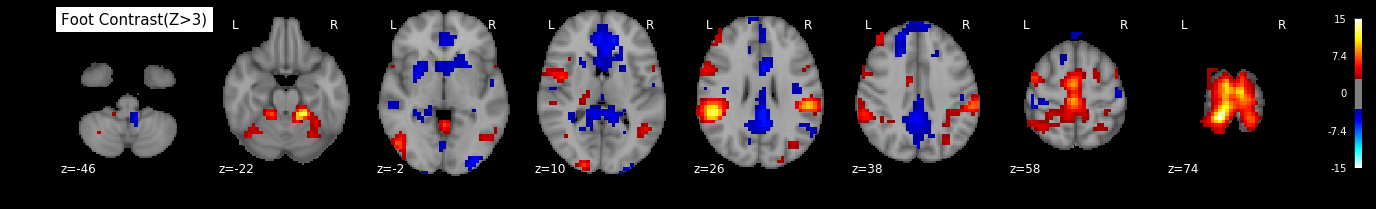

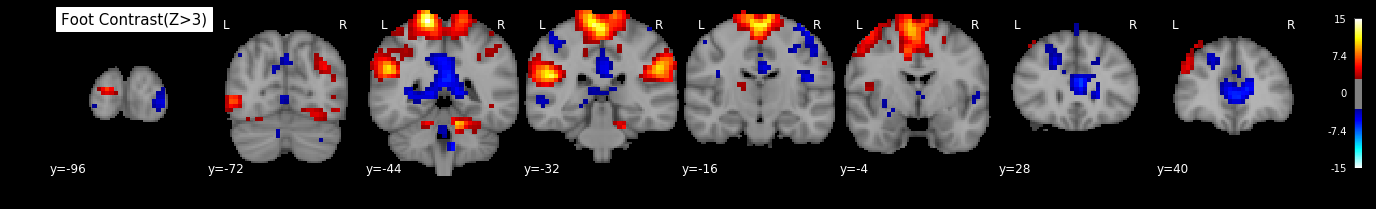

In [16]:
z_map_foot = fmri_glm.compute_contrast('Foot', output_type='z_score')
p_map_foot = fmri_glm.compute_contrast('Foot', output_type='p_value')

plot_stat_map(z_map_foot, threshold=3,
              display_mode='z', cut_coords=8, black_bg=True,
              title='Foot Contrast(Z>3)')
plot_stat_map(z_map_foot, threshold=3,
              display_mode='y', cut_coords=8, black_bg=True,
              title='Foot Contrast(Z>3)')

save_name = save_path + 'zmap_foot' + '.nii.gz'
z_map_foot.to_filename(save_name)

# Extract signal from voxels

In [17]:
# Find the coordinates of the peak
from nibabel.affines import apply_affine
values = z_map_lip.get_data()
coord_peaks = np.dstack(np.unravel_index(np.argsort(values.ravel()),
                                         values.shape))[0, 0, :]
coord_mm = apply_affine(z_map_lip.affine, coord_peaks)

In [28]:
from nilearn.input_data import NiftiSpheresMasker
mask = NiftiSpheresMasker([coord_mm], radius=3,
                          detrend=True, standardize=True,
                          high_pass=None, low_pass=None, t_r=tr)
sig = mask.fit_transform(func_data_sm[1])

In [56]:
frame_times

array([  0.        ,   2.44535519,   4.89071038,   7.33606557,
         9.78142077,  12.22677596,  14.67213115,  17.11748634,
        19.56284153,  22.00819672,  24.45355191,  26.8989071 ,
        29.3442623 ,  31.78961749,  34.23497268,  36.68032787,
        39.12568306,  41.57103825,  44.01639344,  46.46174863,
        48.90710383,  51.35245902,  53.79781421,  56.2431694 ,
        58.68852459,  61.13387978,  63.57923497,  66.02459016,
        68.46994536,  70.91530055,  73.36065574,  75.80601093,
        78.25136612,  80.69672131,  83.1420765 ,  85.58743169,
        88.03278689,  90.47814208,  92.92349727,  95.36885246,
        97.81420765, 100.25956284, 102.70491803, 105.15027322,
       107.59562842, 110.04098361, 112.4863388 , 114.93169399,
       117.37704918, 119.82240437, 122.26775956, 124.71311475,
       127.15846995, 129.60382514, 132.04918033, 134.49453552,
       136.93989071, 139.3852459 , 141.83060109, 144.27595628,
       146.72131148, 149.16666667, 151.61202186, 154.05

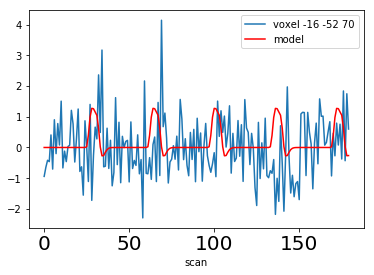

In [29]:
plt.plot(sig, label='voxel %d %d %d' % tuple(coord_mm))
plt.plot(design_matrix['Lips'].tolist(), color='red', label='model')
plt.xlabel('scan')
plt.legend()
plt.show()